*Contenuti*
===
- [Rolling windows](#Rolling-windows)
    - [Esercizio 2.1](#Esercizio-2.1)
- [Analisi dei trend di una serie temporale](#Analisi-dei-trend-di-una-serie-temporale)
    - [Esercizio 2.2](#Esercizio-2.2)
- [Decomposizione](#Decomposizione)

Rolling windows
===
strumento simile a resample; raggruppamento e funzione di aggregazione. Scorre, quindi i dati hanno la stessa granularità di quelli originali.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('../data/OPSD_Germany_all.csv',
                 parse_dates=True,
                 index_col='Date')

df['Renewable'] = df['Solar'] + df['Wind']


df.head()

,Consumption,Wind,Solar,Renewable
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [3]:
pd.DataFrame.rolling?

In [4]:
df['Consumption']

Date
2006-01-01    1069.18400
2006-01-02    1380.52100
2006-01-03    1442.53300
2006-01-04    1457.21700
2006-01-05    1477.13100
                 ...    
2017-12-27    1263.94091
2017-12-28    1299.86398
2017-12-29    1295.08753
2017-12-30    1215.44897
2017-12-31    1107.11488
Name: Consumption, Length: 4383, dtype: float64

immaginiamo di sommare i valori all'interno di una finestra di 3 giorni.

In [5]:
df['Consumption'][:1]

Date
2006-01-01    1069.184
Name: Consumption, dtype: float64

In [6]:
df['Consumption'][:2].sum()

2449.705000000001

In [7]:
df['Consumption'][:3].sum()

3892.2380000000007

In [8]:
df['Consumption'][1:4].sum()

4280.271000000001

In [9]:
df['Consumption'][2:5].sum()

4376.881

In [10]:
df['Consumption'].rolling('3D').sum()

Date
2006-01-01    1069.18400
2006-01-02    2449.70500
2006-01-03    3892.23800
2006-01-04    4280.27100
2006-01-05    4376.88100
                 ...    
2017-12-27    3505.34112
2017-12-28    3693.92172
2017-12-29    3858.89242
2017-12-30    3810.40048
2017-12-31    3617.65138
Name: Consumption, Length: 4383, dtype: float64

In [11]:
df['Consumption'].rolling(3).sum()

Date
2006-01-01           NaN
2006-01-02           NaN
2006-01-03    3892.23800
2006-01-04    4280.27100
2006-01-05    4376.88100
                 ...    
2017-12-27    3505.34112
2017-12-28    3693.92172
2017-12-29    3858.89242
2017-12-30    3810.40048
2017-12-31    3617.65138
Name: Consumption, Length: 4383, dtype: float64

In [12]:
df['Consumption'].rolling(3, min_periods=1).sum()

Date
2006-01-01    1069.18400
2006-01-02    2449.70500
2006-01-03    3892.23800
2006-01-04    4280.27100
2006-01-05    4376.88100
                 ...    
2017-12-27    3505.34112
2017-12-28    3693.92172
2017-12-29    3858.89242
2017-12-30    3810.40048
2017-12-31    3617.65138
Name: Consumption, Length: 4383, dtype: float64

In [13]:
df['Consumption'].rolling(3, center=True).sum()

Date
2006-01-01           NaN
2006-01-02    3892.23800
2006-01-03    4280.27100
2006-01-04    4376.88100
2006-01-05    4337.77500
                 ...    
2017-12-27    3693.92172
2017-12-28    3858.89242
2017-12-29    3810.40048
2017-12-30    3617.65138
2017-12-31           NaN
Name: Consumption, Length: 4383, dtype: float64

In [14]:
df['Consumption'][:7].sum()

9530.300000000001

In [15]:
df['Consumption'].rolling(7, center=True).sum()

Date
2006-01-01           NaN
2006-01-02           NaN
2006-01-03           NaN
2006-01-04    9530.30000
2006-01-05    9669.10100
                 ...    
2017-12-27    8457.49890
2017-12-28    8422.85648
2017-12-29           NaN
2017-12-30           NaN
2017-12-31           NaN
Name: Consumption, Length: 4383, dtype: float64

In [16]:
df_consumption_2017 = df['Consumption']['2017']
df_consumption_2017

Date
2017-01-01    1130.41300
2017-01-02    1441.05200
2017-01-03    1529.99000
2017-01-04    1553.08300
2017-01-05    1547.23800
                 ...    
2017-12-27    1263.94091
2017-12-28    1299.86398
2017-12-29    1295.08753
2017-12-30    1215.44897
2017-12-31    1107.11488
Name: Consumption, Length: 365, dtype: float64

In [17]:
df_consumption_2017.shape

(365,)

In [18]:
df_consumption_2017_resampled = df_consumption_2017.resample('W').mean()
df_consumption_2017_rolling = df_consumption_2017.rolling(7, center=True).mean()

In [19]:
df_consumption_2017_resampled.shape

(53,)

In [20]:
df_consumption_2017_rolling.shape

(365,)

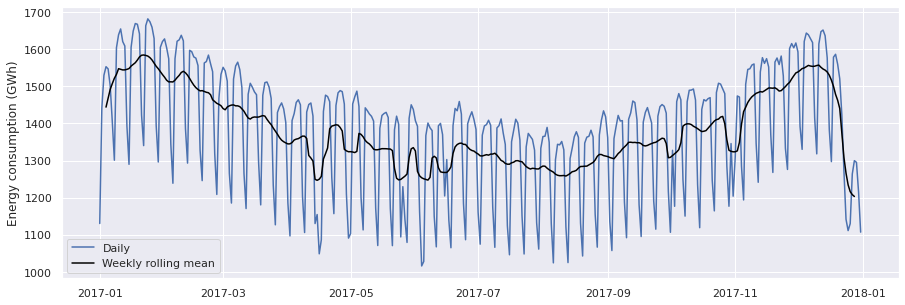

In [21]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(df_consumption_2017,
        label='Daily',
       )

ax.plot(df_consumption_2017_rolling,
        label='Weekly rolling mean',
        color='black')


ax.set_ylabel('Energy consumption (GWh)')
ax.legend()

Esercizio 2.1
---
: confrontare rolling window e resample settimanale su energia solare nel periodo 01-07 2017

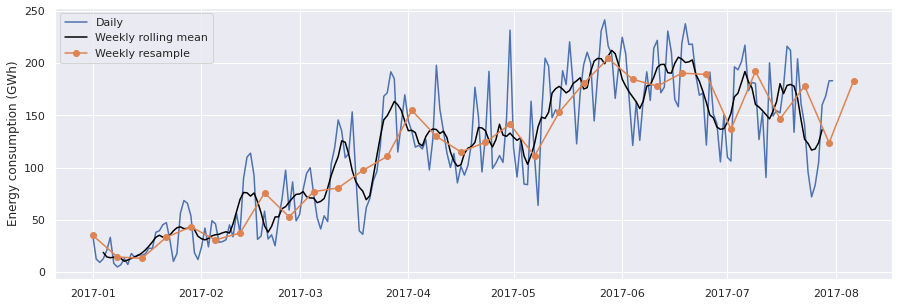

In [22]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(df['Solar']['2017-01':'2017-07'],
        label='Daily'
       )

ax.plot(df['Solar']['2017-01':'2017-07'].rolling(7, center=True).mean(),
        label='Weekly rolling mean',
        color='black')

ax.plot(df['Solar']['2017-01':'2017-07'].resample('W').mean(),
        marker='o',
        label='Weekly resample')

ax.set_ylabel('Energy consumption (GWh)')
ax.legend()

Analisi dei trend di una serie temporale
---

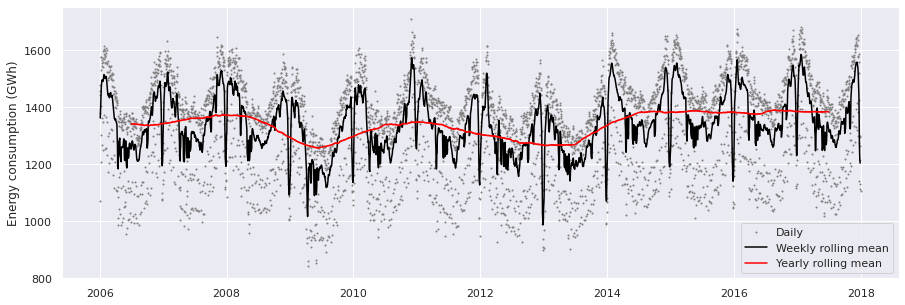

In [23]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(df['Consumption'],
        marker='.',
        markersize=2,
        linestyle='',
        label='Daily',
        color='gray')

ax.plot(df['Consumption'].rolling(7, center=True).mean(),
        label='Weekly rolling mean',
        color='black')

ax.plot(df['Consumption'].rolling(365, center=True).mean(),
        label='Yearly rolling mean',
        color='red')

ax.set_ylabel('Energy consumption (GWh)')
ax.legend()

Esercizio 2.2
---

trend: confronto trend rinnovabili e consumo

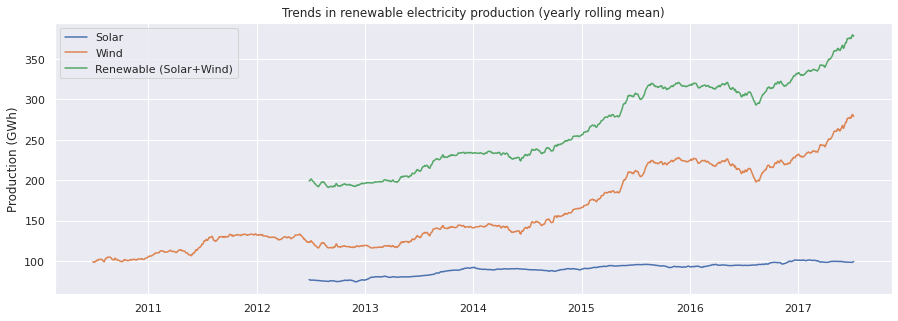

In [24]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(df['Solar'].rolling(365, center=True, min_periods=360).mean(),
        label='Solar')

ax.plot(df['Wind'].rolling(365, center=True, min_periods=360).mean(),
        label='Wind')

ax.plot(df['Renewable'].rolling(365, center=True, min_periods=360).mean(),
        label='Renewable (Solar+Wind)')

ax.set_title('Trends in renewable electricity production (yearly rolling mean)')
ax.set_ylabel('Production (GWh)')
ax.legend()

Decomposizione
===
decomposizione trend/stagionalità; metodi predittivi

---

<script>
  $(document).ready(function(){
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('div.prompt').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by OVHCloud.
</footer>